# Asteroid Classification

### 1. Installing necessary libraries

In [166]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Loading dataset
For a dataset we used Kaggle dataset, available by the link: https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification

In [167]:
zip_file_name = "archive (2).zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Extract all the contents of zip file in current directory
    zip_ref.extractall()

# Now the csv file is available in the current directory
csv_file_name = "nasa.csv"
df = pd.read_csv(csv_file_name)

In [168]:
print(df.head())

   Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762        

### 3. Explotarory and visualization data
3.1 Label encoding

In [169]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["Hazardous"]=label.fit_transform(df["Hazardous"])

In [170]:
df["Hazardous"].value_counts()

0    3932
1     755
Name: Hazardous, dtype: int64

In [171]:
# function for plotting class distribution
def plot_class_distribution(df):
    plt.figure(figsize=(7,7))
    our_ax = sns.countplot(x='Hazardous', data=df)
    
    
    counts = df['Hazardous'].value_counts()
    
    # Add text annotations for the counts
    for i, count in enumerate(counts):
        our_ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
    
    
    plt.title('Class Distributions \n (0: Not Hazardous || 1: Hazardous)', fontsize=14)
    plt.show()

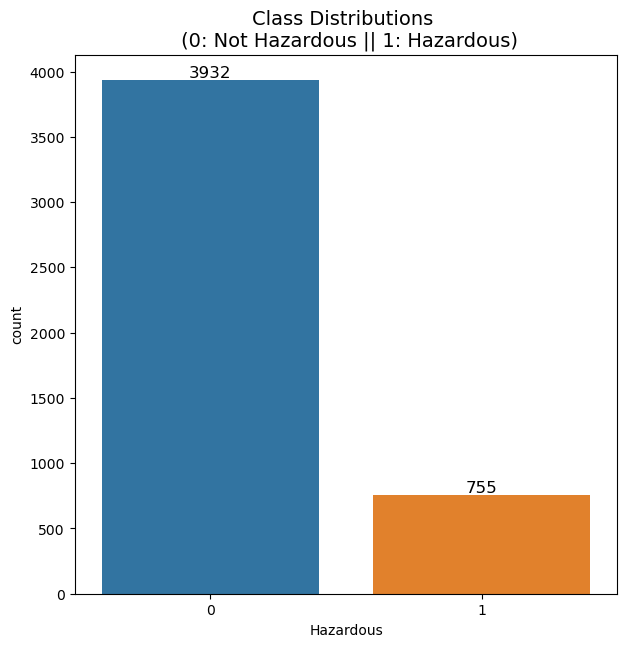

In [172]:
plot_class_distribution(df)

In [173]:
not_hazard=df[df["Hazardous"]==0]
not_hazard.shape

(3932, 40)

In [174]:
hazard=df[df["Hazardous"]==1]
hazard.shape

(755, 40)

In [175]:
df=pd.concat([not_hazard[:1200],hazard],axis=0)

In [176]:
df.drop(["Est Dia in M(min)", "Est Dia in M(max)", "Est Dia in Miles(min)", "Est Dia in Miles(max)", 
          "Est Dia in Feet(min)", "Est Dia in Feet(max)", "Relative Velocity km per sec",
         "Miles per hour", "Miss Dist.(Astronomical)", "Miss Dist.(lunar)", "Miss Dist.(miles)", "Orbiting Body", "Equinox"],axis=1,inplace=True)

In [177]:
#separating the input features (X) and the target variable (Y)
x = df.drop(columns=['Hazardous']) # X contains all columns except 'Hazardous'
y = df['Hazardous'] # Y contains only the 'Hazardous' column, which is the target variable

In [178]:
x.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
1,3723955,3723955,21.3,0.146068,0.326618,1995-01-01,788947200000,65210.346095,57298148.0,21,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
3,3092506,3092506,27.4,0.008801,0.019681,1995-01-15,790156800000,40225.948191,42683616.0,7,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
5,3671135,3671135,19.6,0.319562,0.714562,1995-01-15,790156800000,38911.838251,58759768.0,40,...,1.323532,17.927751,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295
6,2495323,2495323,19.6,0.319562,0.714562,1995-01-15,790156800000,38911.829716,58759532.0,43,...,1.323532,17.927748,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295
7,2153315,2153315,19.2,0.384198,0.859093,1995-01-22,790761600000,87918.782382,19324928.0,22,...,1.237475,34.695127,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978


<AxesSubplot:title={'center':'Correlation with response variable'}>

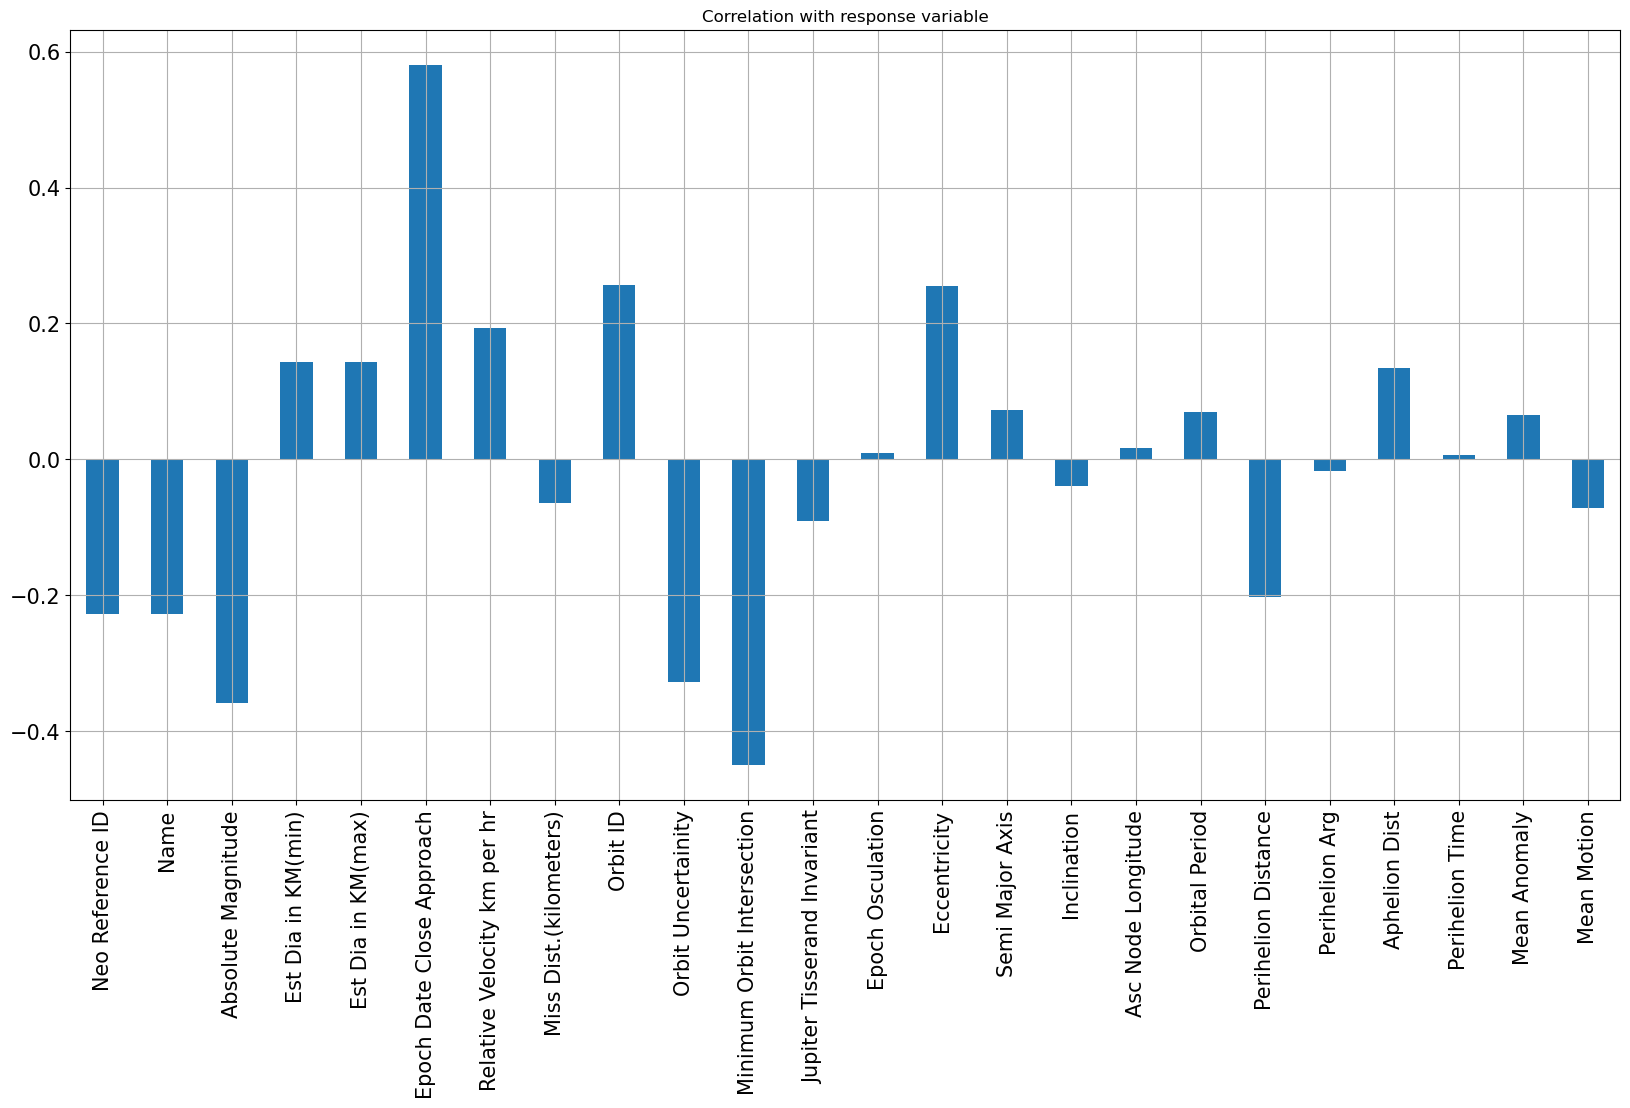

In [179]:
x.corrwith(y).plot.bar(figsize=(20,10),title="Correlation with response variable",fontsize=15,rot=90,grid=True)

### 4.Creating and training the model

In [180]:
df = pd.get_dummies(df)

#separating the input features (X) and the target variable (Y)
x = df.drop(columns=['Hazardous']) # X contains all columns except 'Hazardous'
y = df['Hazardous'] # Y contains only the 'Hazardous' column, which is the target variable

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [181]:
from sklearn.preprocessing import StandardScaler

#Scaling the dataset
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [185]:
#Building the Model
model = Sequential()
model.add(Dense(64, input_dim=(20), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

#Compiling the Model 
compilation = model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#Training the model
X_train = X_train[:,:20]
X_test = X_test[:,:20]
model.fit(X_train, y_train, epochs=15, verbose=False)

In [186]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.4f}")

16/16 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9673
Test Loss: 0.0880
Test Accuracy: 96.7280


In [187]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print(f"Train Loss: {loss:.4f}")
print(f"Train Accuracy: {accuracy*100:.4f}")

46/46 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9932
Test Loss: 0.0258
Test Accuracy: 99.3179
